In [96]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 8 (INSECTS-incremental-abrupt_balanced_norm.csv Data)
# EVD on non-stationary data
#
# Author: Chanchal Chatterjee
#

In [97]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [99]:
# Data obtained from USP DS Repository https://sites.google.com/view/uspdsrepository
#get data here: https://sites.google.com/view/uspdsrepository
dataset   = pd.read_csv("gs://chanchal_book_bucket1/INSECTS-incremental-abrupt_balanced_norm.csv")
dataset = dataset.dropna()
print(dataset.shape)
print(dataset.head())


(79986, 34)
         F1        F2        F3        F4        F5        F6        F7  \
0  0.104786  0.177437  0.127348  0.166377  0.173653  0.210802  0.110593   
1  0.222615  0.082908  0.012211  0.132240  0.158171  0.114506  0.089346   
2  0.191783  0.316429  0.221004  0.298153  0.367791  0.357252  0.266188   
3  0.106044  0.188385  0.139068  0.183759  0.001392  0.125598  0.117964   
4  0.102941  0.169156  0.122622  0.166684  0.206373  0.249206  0.154802   

         F8        F9       F10  ...       F25       F26       F27       F28  \
0  0.112789  0.119592  0.097037  ...  0.044745  0.012664  0.019215  0.033919   
1  0.107228  0.147048  0.094347  ...  0.055497  0.026038  0.025214  0.035499   
2  0.005467  0.022786  0.040412  ...  0.006443  0.010801  0.007107  0.004875   
3  0.103110  0.088212  0.071891  ...  0.030993  0.009889  0.010659  0.014419   
4  0.335912  0.371870  0.163826  ...  0.056908  0.016429  0.014142  0.089209   

        F29       F30       F31       F32       F33     

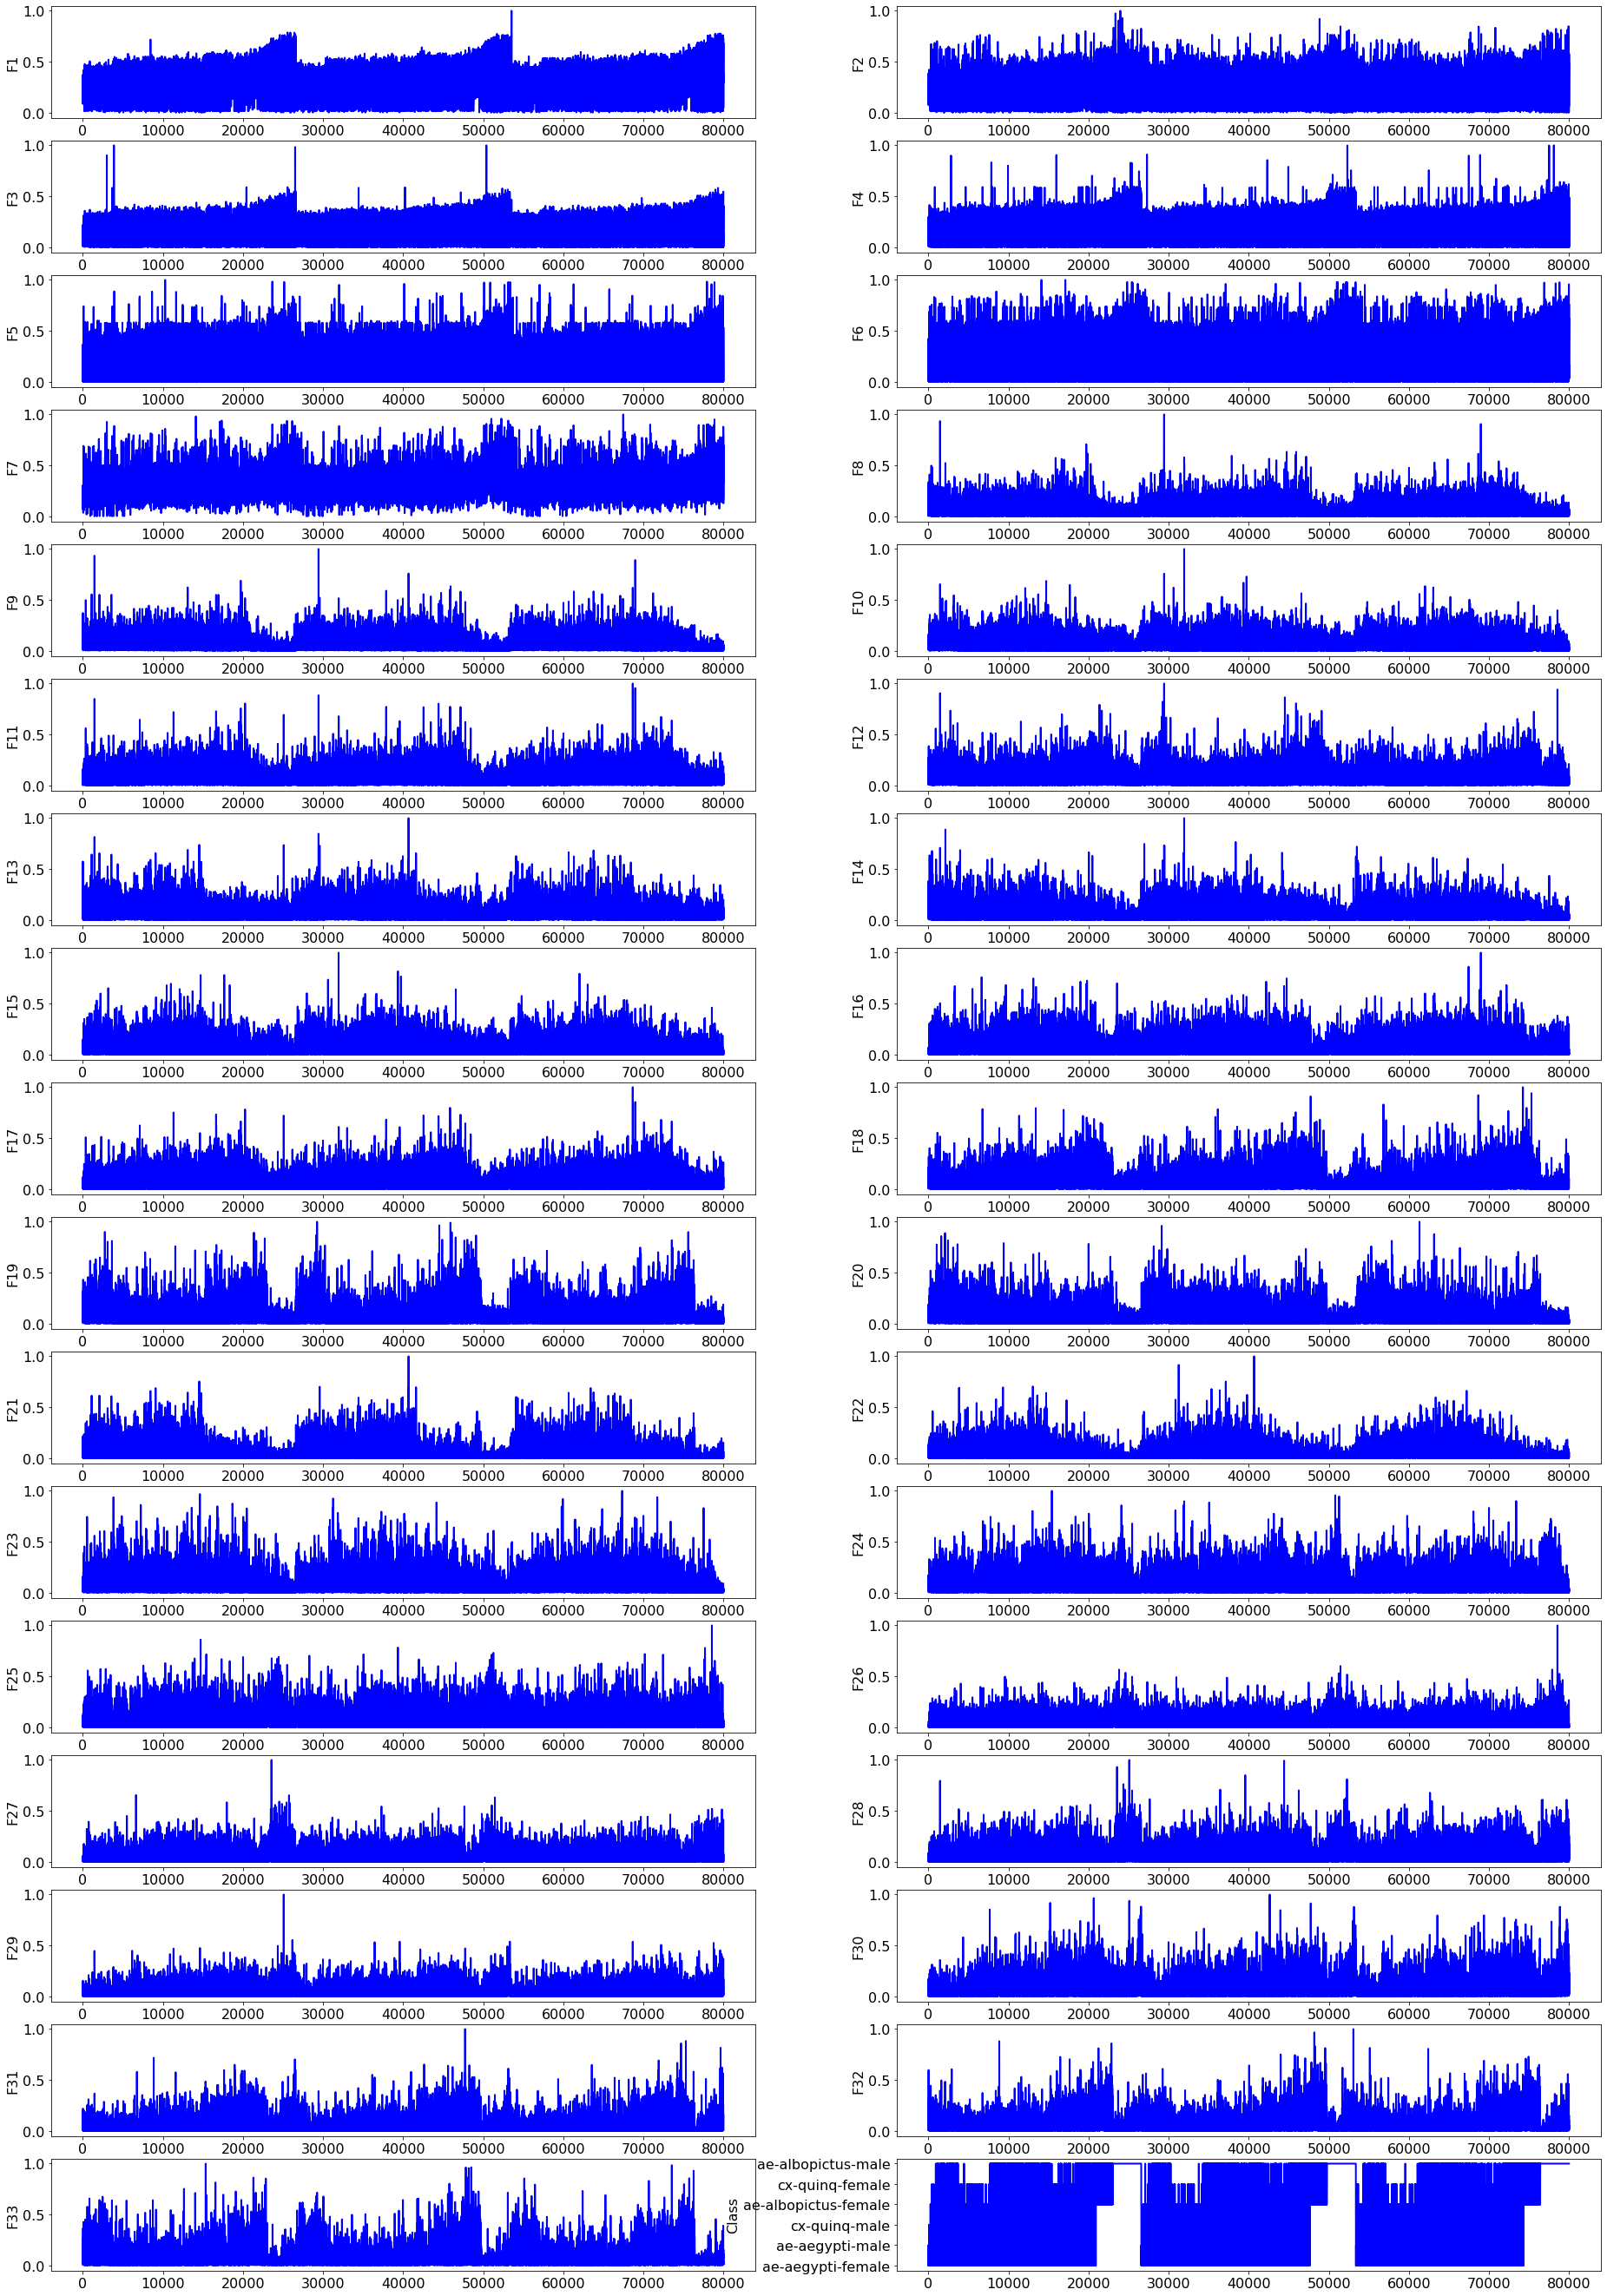

In [100]:
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()

------------------------------------------
## Adaptive Linear Eigen Decomposition
### Using Non-Stationary Components Only

In [102]:
dataset1 = dataset.drop('Class', 1) #.iloc[0:10000]
print(dataset1.shape)
print(dataset1.head())


(79986, 33)
         F1        F2        F3        F4        F5        F6        F7  \
0  0.104786  0.177437  0.127348  0.166377  0.173653  0.210802  0.110593   
1  0.222615  0.082908  0.012211  0.132240  0.158171  0.114506  0.089346   
2  0.191783  0.316429  0.221004  0.298153  0.367791  0.357252  0.266188   
3  0.106044  0.188385  0.139068  0.183759  0.001392  0.125598  0.117964   
4  0.102941  0.169156  0.122622  0.166684  0.206373  0.249206  0.154802   

         F8        F9       F10  ...       F24       F25       F26       F27  \
0  0.112789  0.119592  0.097037  ...  0.061596  0.044745  0.012664  0.019215   
1  0.107228  0.147048  0.094347  ...  0.084172  0.055497  0.026038  0.025214   
2  0.005467  0.022786  0.040412  ...  0.009317  0.006443  0.010801  0.007107   
3  0.103110  0.088212  0.071891  ...  0.058844  0.030993  0.009889  0.010659   
4  0.335912  0.371870  0.163826  ...  0.035229  0.056908  0.016429  0.014142   

        F28       F29       F30       F31       F32     

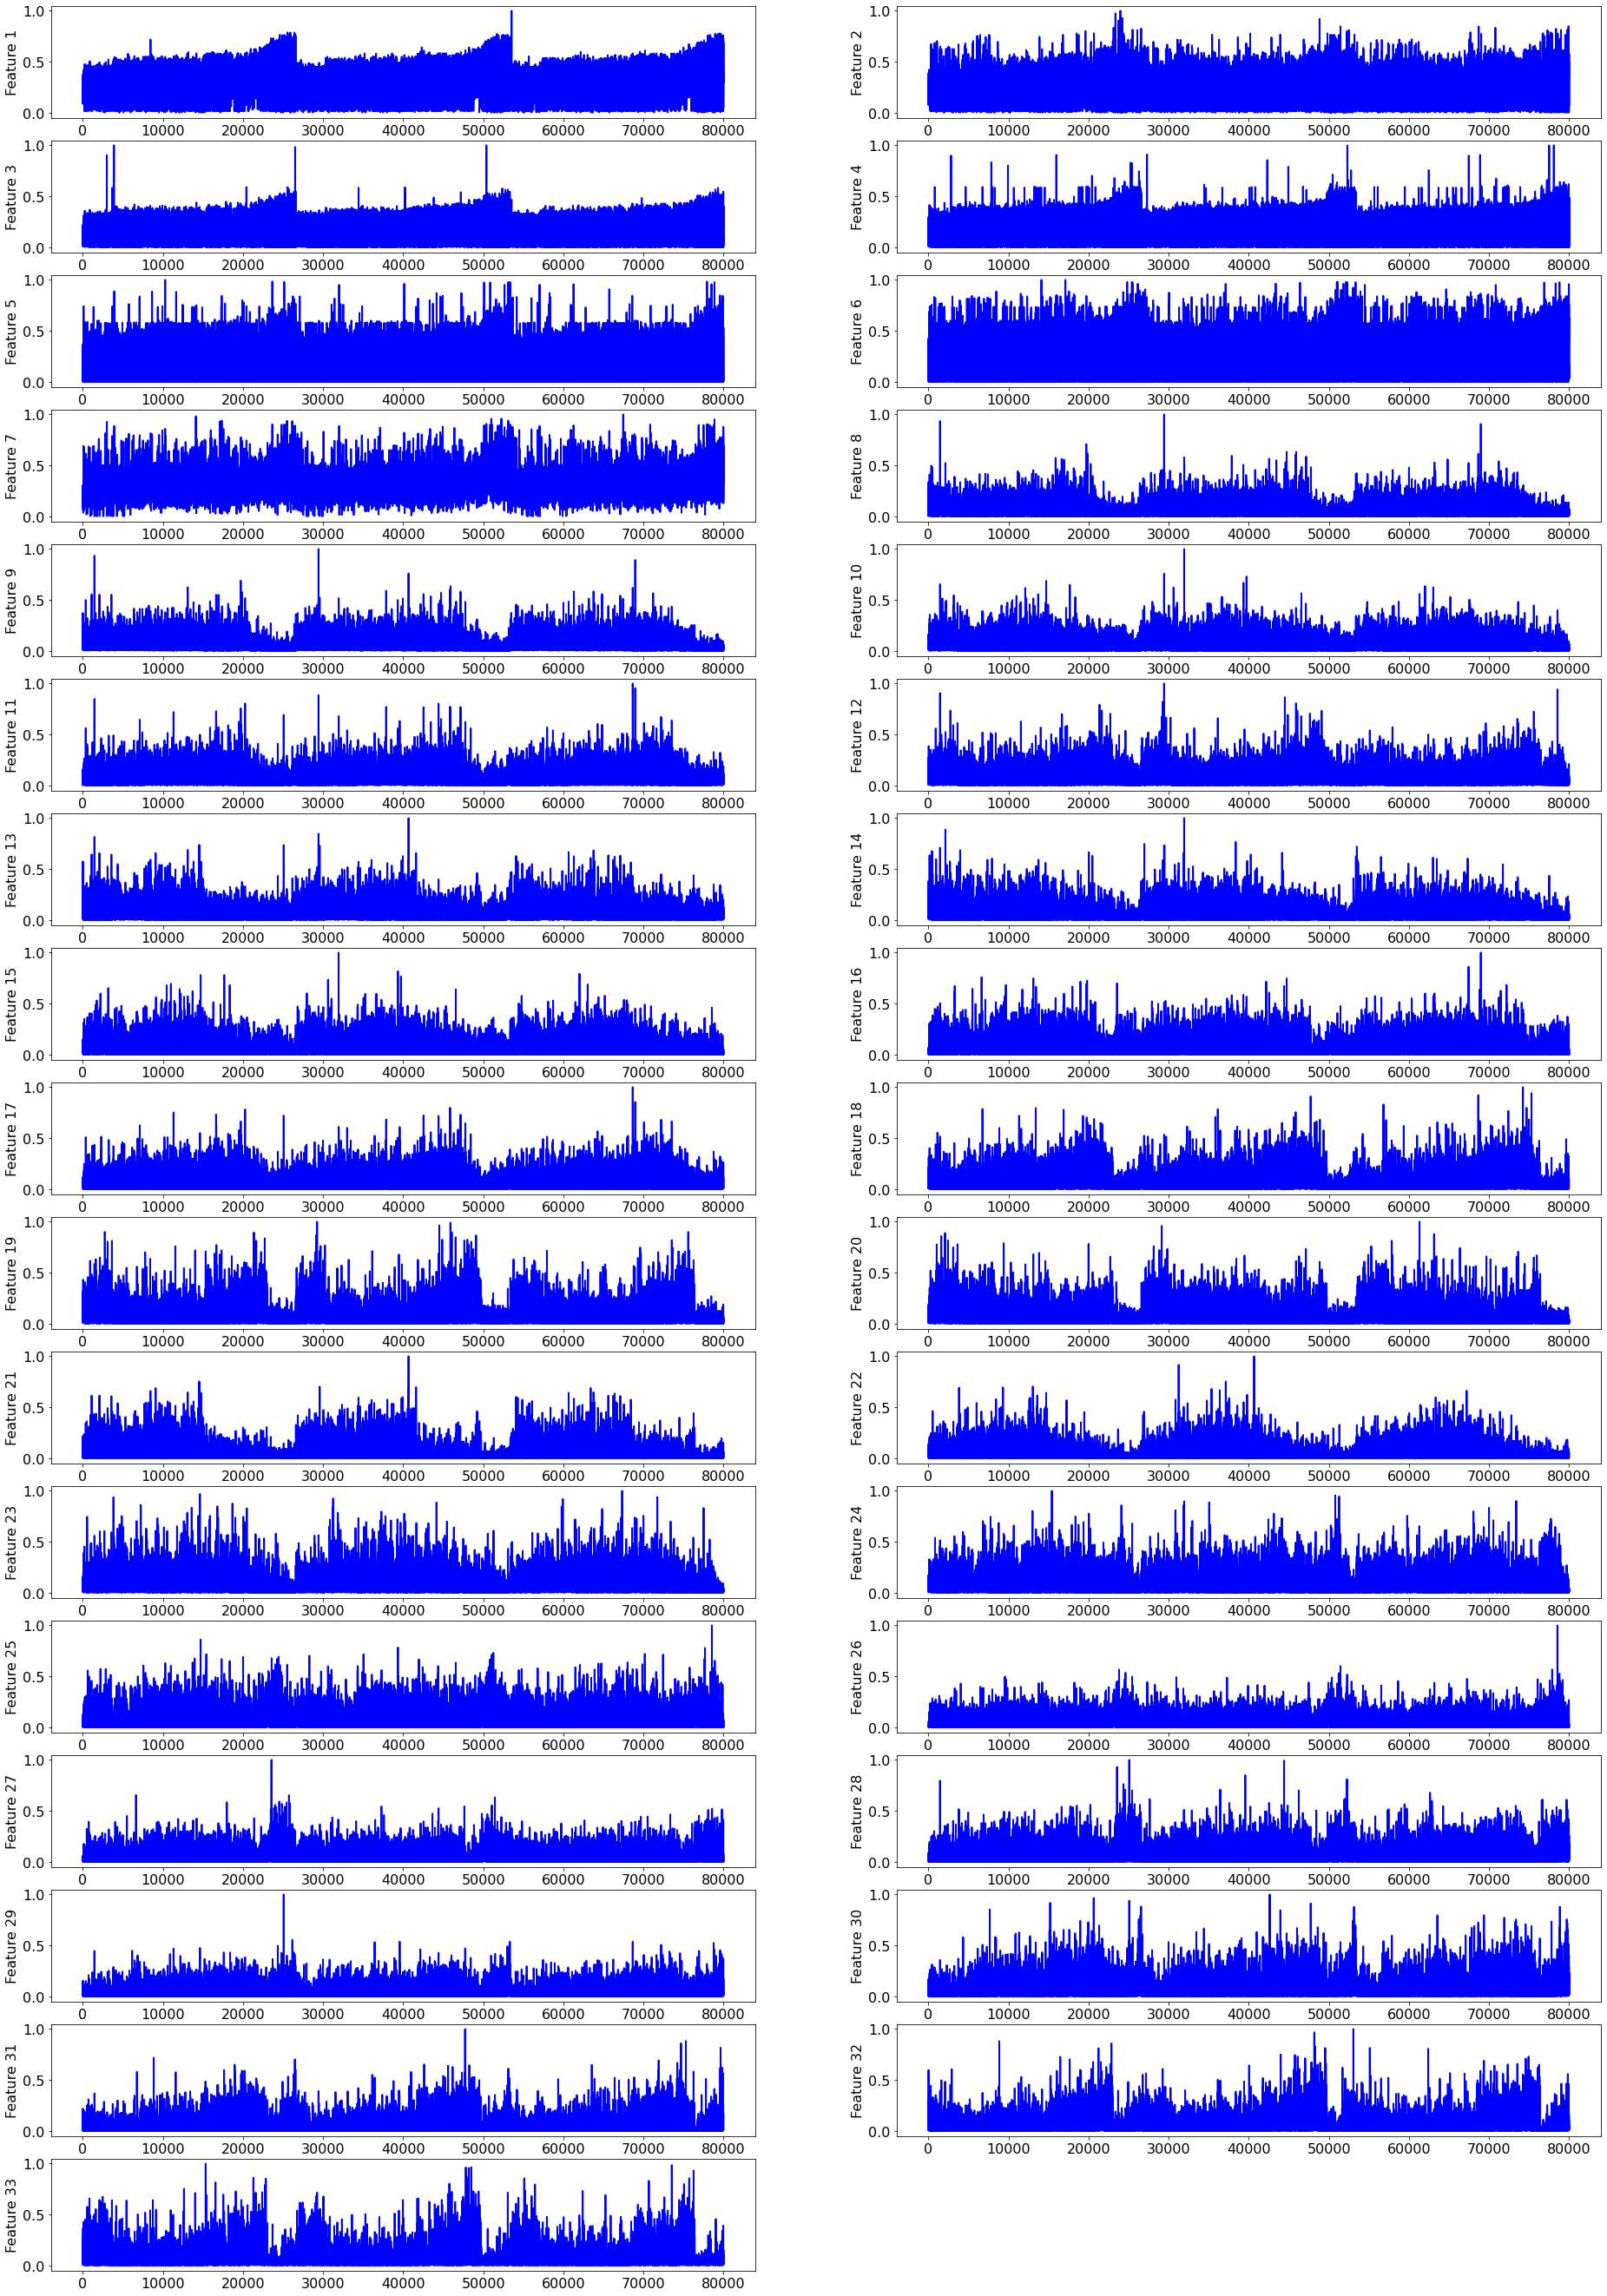

In [103]:
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset1.columns
for i in range(dataset1.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel('Feature {}'.format(i+1))
    plt.plot(dataset1[cols[i]], lw=2, color='b')
plt.show()


In [104]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = dataset1.shape[0]
nDim = dataset1.shape[1]

A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
N = np.zeros(shape=(1,nDim)) # stores eigen norms
W = 0.1 * np.ones(shape=(nDim,nDim)) # stores adaptive eigenvectors
for iter in range(nSamples//1):
    cnt = iter + 1
    x = np.array(dataset1.iloc[iter])
    x = x.reshape(nDim,1)
    A = A + (1.0/cnt)*((np.dot(x, x.T)) - A)
    etat = 1.0/(25 + cnt)
    # Deflated Gradient Descent
    W = W + etat*(A @ W - 0.5*W @ np.triu(W.T @ A @ W) - 0.5*A @ W @ np.triu(W.T @ W))
    newnorm = la.norm(W, axis=0)
    N = np.vstack([N, newnorm])
print("W=\n", W)


W=
 [[ 0.34043765  0.11403578  0.05139549 ... -0.03710972 -0.03641781
  -0.03570469]
 [ 0.31764478  0.1092219   0.05052007 ... -0.04214971 -0.04171806
  -0.04126044]
 [ 0.24593864  0.08958173  0.04654396 ... -0.0133325  -0.01296587
  -0.01258575]
 ...
 [ 0.06857665  0.04353679  0.03769741 ...  0.03735467  0.03727524
   0.03718926]
 [ 0.08538596  0.04848493  0.03842531 ...  0.02948468  0.02945621
   0.02942304]
 [ 0.10040985  0.05176728  0.03916586 ...  0.02977394  0.02979963
   0.02982174]]


In [105]:
import math
from scipy.linalg import eigh
WTW = W.T @ W
WTAW = W.T @ A @ W
#print("WTW=\n", WTW)
#print("WTAW=\n", WTAW)
eigvals, eigvecs = eigh(A)
#print("PHI=\n", eigvecs)
print("Lambda=\n", eigvals)
print("Diags of WTAW")
print([WTAW[i,i] for i in range(len(WTAW[0]))])
print("Diags of WTW")
print([WTW[i,i] for i in range(len(WTW[0]))])


Lambda=
 [1.72708167e-05 2.57668081e-05 3.94802809e-05 5.04442286e-05
 6.92248581e-05 8.22048947e-05 9.65330106e-05 1.16755015e-04
 1.29298986e-04 1.83774668e-04 2.25281279e-04 4.07855803e-04
 4.88097354e-04 5.84036309e-04 9.83028287e-04 1.24228919e-03
 1.59119505e-03 1.72930404e-03 2.33296668e-03 2.40426677e-03
 3.48648286e-03 5.27082470e-03 8.21409174e-03 1.11253245e-02
 1.14291921e-02 1.24866780e-02 1.54300492e-02 1.74739919e-02
 1.90741674e-02 2.13211617e-02 2.55435281e-02 3.15136291e-02
 5.72465563e-01]
Diags of WTAW
[0.551083968578603, 0.07503711998053808, 0.021006305288455505, 0.007524833687357032, 0.0029836749108952754, 0.00130888785439027, 0.0007623830640418381, 0.0007138726077385834, 0.0008956933918786805, 0.0011807650919760091, 0.0015037693435842698, 0.0018293181377129813, 0.0021377392422161534, 0.0024181823010166886, 0.002665028210912572, 0.002875894816814462, 0.0030504615831195296, 0.0031897382289941055, 0.003295587238096407, 0.0033703995055381604, 0.0034168674060612073, 0

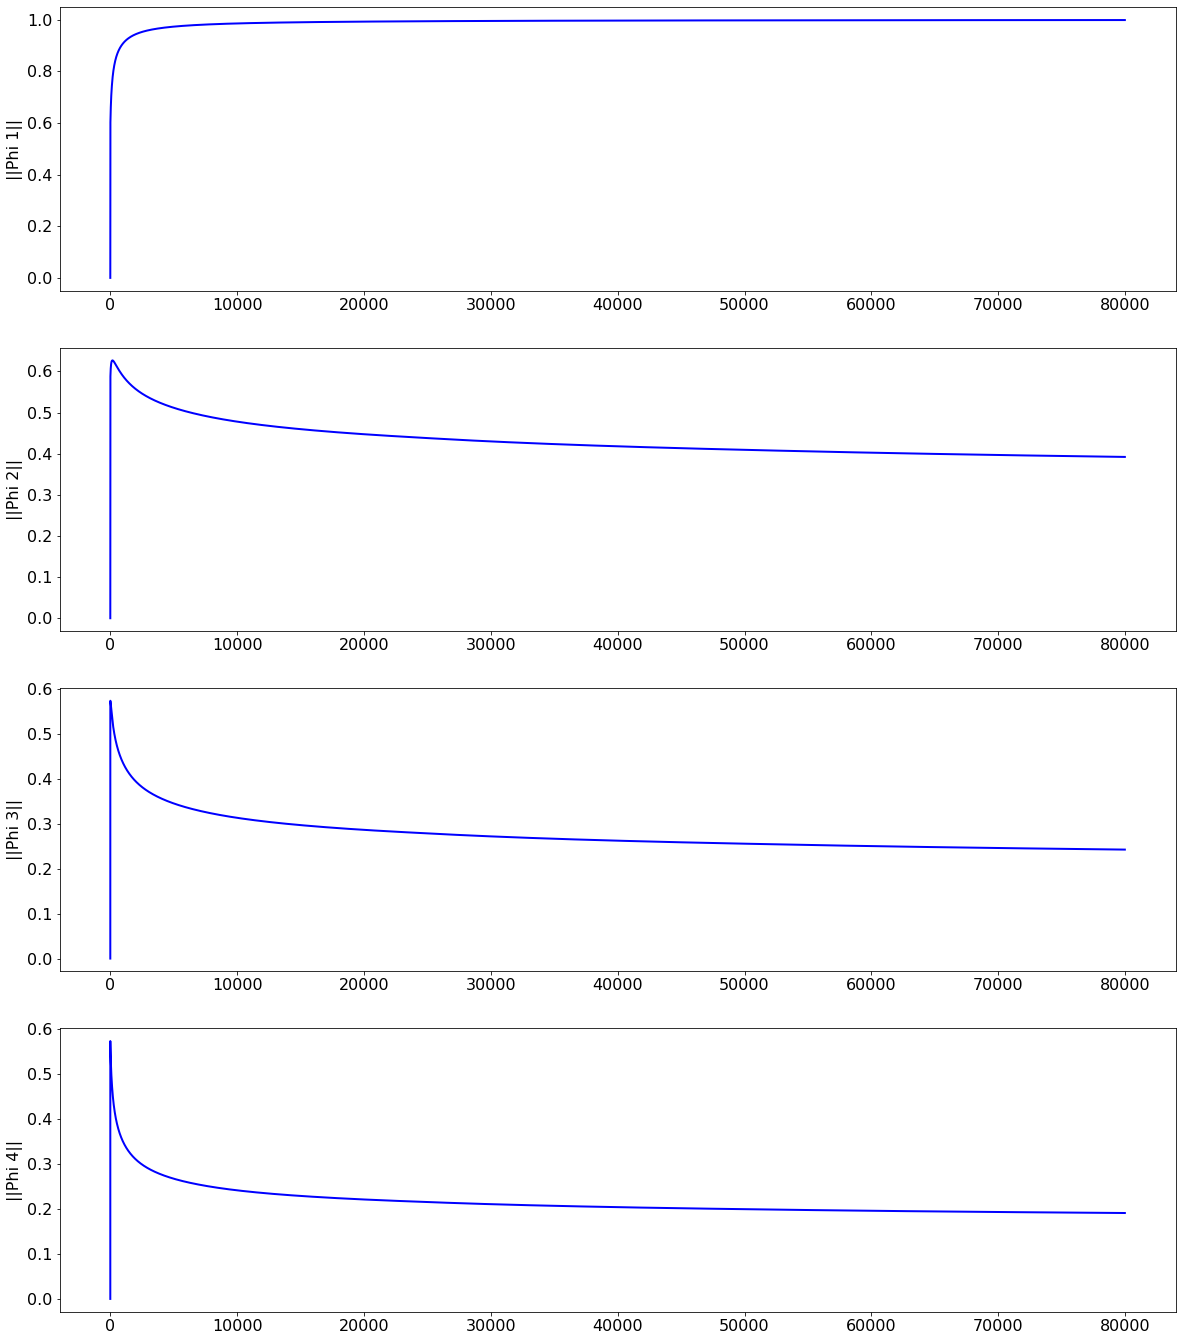

In [106]:
cols = dataset.columns
norms = pd.DataFrame({cols[0]: N[:, 0], cols[1]: N[:, 1], cols[2]: N[:, 2], cols[3]: N[:, 3], \
                      cols[4]: N[:, 4], cols[5]: N[:, 5], cols[6]: N[:, 6], cols[7]: N[:, 7]})

plt.figure(figsize=(20, 24))
plt.rcParams.update({'font.size': 16})
cols = norms.columns
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.ylabel('||Phi {}||'.format(i+1))
    plt.plot(norms[cols[i]], lw=2, color='b')
plt.show()